Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data handling

In [3]:
import pandas as pd

csv_file_path = '/content/drive/MyDrive/cleaned_labels.csv'

df = pd.read_csv(csv_file_path)

total_rows = len(df)

print(f"Total number of items (rows) in '{csv_file_path}': {total_rows}")

Total number of items (rows) in '/content/drive/MyDrive/cleaned_labels.csv': 8408


In [4]:
import pandas as pd

csv_files = [
    '/content/drive/MyDrive/cutmixed_images/labelsX.csv',
    '/content/drive/MyDrive/cutmixed_images/labelsY.csv',
    '/content/drive/MyDrive/cutmixed_images/labelsZ.csv',
   '/content/drive/MyDrive/cleaned_labels.csv'
]

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)

    if 'image' in df.columns and 'level' in df.columns:
        df = df.rename(columns={'image': 'filename', 'level': 'label'})
    elif 'filename' in df.columns and 'labels' in df.columns:
        df = df.rename(columns={'labels': 'label'})

    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)
merged_df.to_csv('/content/drive/MyDrive/merged_labels.csv', index=False)

print("CSV files standardized and merged successfully.")

CSV files standardized and merged successfully.


In [5]:
data = pd.read_csv('/content/drive/MyDrive/merged_labels.csv')
print(data.value_counts().sum())
print(data['label'].unique())
print(data['label'].value_counts().unique())
data.head()

9833
[4 3 1 0 2]
[6150 1283  800]


,filename,label
0,cutmixed_4_0.jpeg,4
1,cutmixed_4_1.jpeg,4
2,cutmixed_4_2.jpeg,4
3,cutmixed_4_3.jpeg,4
4,cutmixed_4_4.jpeg,4


In [6]:
class_counts = merged_df['label'].value_counts()

print("Number of unique classes:", len(class_counts))
print("\nClass distribution:\n", class_counts)

Number of unique classes: 5

Class distribution:
 label
0    6150
2    1283
4     800
1     800
3     800
Name: count, dtype: int64


In [7]:
data = pd.read_csv('/content/drive/MyDrive/merged_labels.csv')
print(data.value_counts().sum())
print(data['label'].unique())
print(data['label'].value_counts().unique())
data.head()

9833
[4 3 1 0 2]
[6150 1283  800]


,filename,label
0,cutmixed_4_0.jpeg,4
1,cutmixed_4_1.jpeg,4
2,cutmixed_4_2.jpeg,4
3,cutmixed_4_3.jpeg,4
4,cutmixed_4_4.jpeg,4


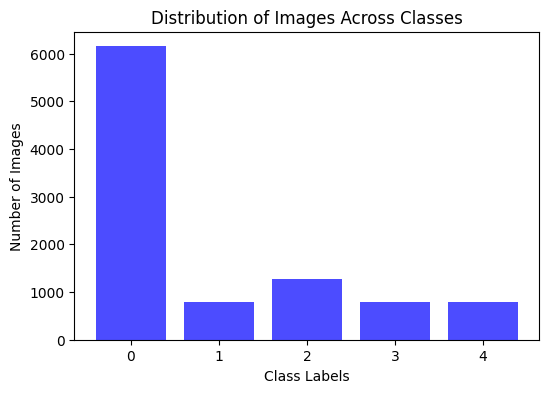

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


class_counts = data['label'].value_counts().sort_index()  # Get counts and sort by class labels


plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='blue', alpha=0.7)

plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')


plt.xticks(class_counts.index)

plt.show()


In [9]:
print("Number of images in each class:")
for level, count in class_counts.items():
    print(f"Class {level}: {count} images")

Number of images in each class:
Class 0: 6150 images
Class 1: 800 images
Class 2: 1283 images
Class 3: 800 images
Class 4: 800 images


Class distribution after undersampling: {0: 800, 1: 800, 2: 800, 3: 800, 4: 800}
Resampled class counts: {0: 800, 1: 800, 2: 800, 3: 800, 4: 800}


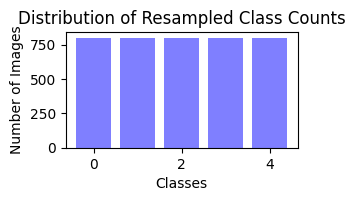

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X = data['filename']
y = data['label']

X_array = X.values.reshape(-1, 1)
y_array = y.values

class_counts = {0: 6150, 1: 800, 2: 1283, 3: 800, 4: 800}
target_count = min(class_counts.values())

undersampler = RandomUnderSampler(sampling_strategy={label: target_count for label in class_counts.keys()})
X_under, y_under = undersampler.fit_resample(X_array, y_array)

print("Class distribution after undersampling:", dict(zip(*np.unique(y_under, return_counts=True))))

oversampler = RandomOverSampler(sampling_strategy={label: target_count for label in np.unique(y_under)})
X_resampled, y_resampled = oversampler.fit_resample(X_under, y_under)

unique, counts = np.unique(y_resampled, return_counts=True)
resampled_class_counts = dict(zip(unique, counts))
print("Resampled class counts:", resampled_class_counts)

plt.figure(figsize=(3, 1.5))
plt.bar(resampled_class_counts.keys(), resampled_class_counts.values(), color='blue', alpha=0.5)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Resampled Class Counts')
plt.show()


In [11]:

new_X = []
for i in X_resampled:
  for j in i:
    new_X.append(j)

In [12]:
y_resampled

array([0, 0, 0, ..., 4, 4, 4])

In [13]:
resampled_data = {'filename': new_X,
        'label': y_resampled}

balanced_data = pd.DataFrame(resampled_data)


balanced_data.sample(10)

,filename,label
41,18984_right,0
799,17950_right,0
477,13816_left,0
1388,11738_left,1
3343,cutmixed_4_421.jpeg,4
2473,cutmixed_class3_224.jpeg,3
2295,12859_left,2
3095,11590_left,3
1643,1873_right,2
1345,cutmixed_11.jpeg,1


In [14]:
print(balanced_data.value_counts().sum())
print(balanced_data['label'].unique())
print(balanced_data['label'].value_counts().unique())

4000
[0 1 2 3 4]
[800]


In [15]:
balanced_data['filename'] = balanced_data['filename']+'.jpeg'
balanced_data['label'] = balanced_data['label'].astype(str)
balanced_data.head()

,filename,label
0,18021_right.jpeg,0
1,19174_right.jpeg,0
2,15205_left.jpeg,0
3,12725_right.jpeg,0
4,13958_right.jpeg,0


In [16]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5

In [17]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(balanced_data, test_size=0.2, random_state=42)

Ben Gragham's preprocessing

In [18]:
import cv2
import numpy as np
import os

def scale_radius(img, scale):
    """
    Scales the image to a specified radius.
    """
    x = img[img.shape[0] // 2, :, :].sum(1)
    r = (x > x.mean() / 10).sum() / 2
    s = scale * 1.0 / r
    return cv2.resize(img, (0, 0), fx=s, fy=s)

def subtract_local_average_color(img):
    """
    Subtracts the local average color.
    """
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0),  10), -4, 128)
    return img

def clip_image(img, target_size=(224, 224)):
    """
    Clips the image to 90% size to remove boundary effects, and optionally applies resizing and normalization.
    """
    img_a = scale_radius(img, 300)
    img = subtract_local_average_color(img_a)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    center = (img.shape[1] // 2, img.shape[0] // 2)
    radius = int(300 * 0.9)
    cv2.circle(mask, center, radius, 255, -1)
    img_masked = cv2.bitwise_and(img,img, mask=mask)

    # # Resize the image
    img_resized = cv2.resize(img_masked, target_size)


    return img_resized


In [19]:

import os
import pandas as pd

cutmixed_train = train[train['filename'].str.startswith('cutmixed_')]
cutmixed_val = val[val['filename'].str.startswith('cutmixed_')]

print("Total cutmixed_ images in train:", len(cutmixed_train))
print("Total cutmixed_ images in val:", len(cutmixed_val))

cutmixed_train['exists'] = cutmixed_train['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))
cutmixed_val['exists'] = cutmixed_val['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))

missing_train_files = cutmixed_train[~cutmixed_train['exists']]
missing_val_files = cutmixed_val[~cutmixed_val['exists']]

print("Missing train files:", missing_train_files['filename'].tolist())
print("Missing val files:", missing_val_files['filename'].tolist())

Total cutmixed_ images in train: 1149
Total cutmixed_ images in val: 276
Missing train files: ['cutmixed_4_403.jpeg.jpeg', 'cutmixed_80.jpeg.jpeg', 'cutmixed_102.jpeg.jpeg', 'cutmixed_4_170.jpeg.jpeg', 'cutmixed_class3_88.jpeg.jpeg', 'cutmixed_4_256.jpeg.jpeg', 'cutmixed_4_487.jpeg.jpeg', 'cutmixed_class3_528.jpeg.jpeg', 'cutmixed_class3_264.jpeg.jpeg', 'cutmixed_4_424.jpeg.jpeg', 'cutmixed_class3_247.jpeg.jpeg', 'cutmixed_45.jpeg.jpeg', 'cutmixed_class3_260.jpeg.jpeg', 'cutmixed_4_502.jpeg.jpeg', 'cutmixed_4_24.jpeg.jpeg', 'cutmixed_4_292.jpeg.jpeg', 'cutmixed_4_110.jpeg.jpeg', 'cutmixed_4_255.jpeg.jpeg', 'cutmixed_4_460.jpeg.jpeg', 'cutmixed_4_501.jpeg.jpeg', 'cutmixed_4_450.jpeg.jpeg', 'cutmixed_173.jpeg.jpeg', 'cutmixed_4_271.jpeg.jpeg', 'cutmixed_20.jpeg.jpeg', 'cutmixed_4_0.jpeg.jpeg', 'cutmixed_class3_214.jpeg.jpeg', 'cutmixed_class3_132.jpeg.jpeg', 'cutmixed_4_405.jpeg.jpeg', 'cutmixed_4_226.jpeg.jpeg', 'cutmixed_class3_293.jpeg.jpeg', 'cutmixed_4_56.jpeg.jpeg', 'cutmixed_class

<ipython-input-19-77bcb2fc647d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_train['exists'] = cutmixed_train['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))
<ipython-input-19-77bcb2fc647d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_val['exists'] = cutmixed_val['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))


In [20]:
cutmixed_train['filename'] = cutmixed_train['filename'].apply(lambda x: os.path.basename(x))
cutmixed_val['filename'] = cutmixed_val['filename'].apply(lambda x: os.path.basename(x))


<ipython-input-20-6262e7331acc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_train['filename'] = cutmixed_train['filename'].apply(lambda x: os.path.basename(x))
<ipython-input-20-6262e7331acc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_val['filename'] = cutmixed_val['filename'].apply(lambda x: os.path.basename(x))


In [21]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

def check_filenames(df, directory):
    missing_files = [f for f in df['filename'] if not os.path.exists(os.path.join(directory, f))]
    if missing_files:
        print(f"Missing files: {len(missing_files)}")
        print("Sample missing files:", missing_files[:5])
    return len(missing_files) == 0

image_directory = '/content/drive/MyDrive/train_dr'

if not check_filenames(train, image_directory) or not check_filenames(val, image_directory):
    print("Some image files are missing. Please verify the paths and filenames.")
else:
    print("All files are present.")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Images validated and generators created successfully.")


Missing files: 1149
Sample missing files: ['cutmixed_4_403.jpeg.jpeg', 'cutmixed_80.jpeg.jpeg', 'cutmixed_102.jpeg.jpeg', 'cutmixed_4_170.jpeg.jpeg', 'cutmixed_class3_88.jpeg.jpeg']
Some image files are missing. Please verify the paths and filenames.
Found 2051 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1149 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 524 validated image filenames belonging to 5 classes.
Images validated and generators created successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 276 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [22]:
# Correct filenames by removing extra extensions
train['filename'] = train['filename'].apply(lambda x: x.replace('.jpeg.jpeg', '.jpeg'))
val['filename'] = val['filename'].apply(lambda x: x.replace('.jpeg.jpeg', '.jpeg'))

# Re-check if files exist after correcting filenames
print("Checking corrected filenames...")
missing_train_files = [f for f in train['filename'] if not os.path.exists(os.path.join(image_directory, f))]
missing_val_files = [f for f in val['filename'] if not os.path.exists(os.path.join(image_directory, f))]

print(f"Missing files in train after correction: {len(missing_train_files)}")
print(f"Missing files in val after correction: {len(missing_val_files)}")

if missing_train_files:
    print("Sample missing train files:", missing_train_files[:5])
if missing_val_files:
    print("Sample missing val files:", missing_val_files[:5])


Checking corrected filenames...
Missing files in train after correction: 0
Missing files in val after correction: 0


In [23]:
# Filter cutmixed_ images
cutmixed_train = train[train['filename'].str.startswith('cutmixed_')]
cutmixed_val = val[val['filename'].str.startswith('cutmixed_')]

# Print counts to verify
print(f"Total cutmixed_ images in train: {len(cutmixed_train)}")
print(f"Total cutmixed_ images in val: {len(cutmixed_val)}")

# Combine the filtered cutmixed_ images with the original DataFrames
train_combined = pd.concat([train, cutmixed_train]).drop_duplicates(subset='filename')
val_combined = pd.concat([val, cutmixed_val]).drop_duplicates(subset='filename')

# Print counts to verify combined DataFrames
print(f"Total images in combined train DataFrame: {len(train_combined)}")
print(f"Total images in combined val DataFrame: {len(val_combined)}")

Total cutmixed_ images in train: 1149
Total cutmixed_ images in val: 276
Total images in combined train DataFrame: 3200
Total images in combined val DataFrame: 800


In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_combined,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_combined,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Images validated and generators created successfully.")


Found 3200 validated image filenames belonging to 5 classes.
Found 800 validated image filenames belonging to 5 classes.
Images validated and generators created successfully.


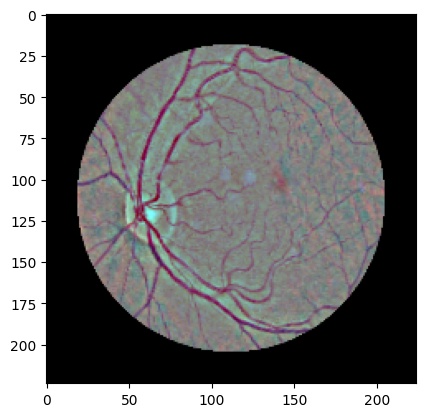

In [ ]:
plt.imshow(next(train_generator)[0][0])

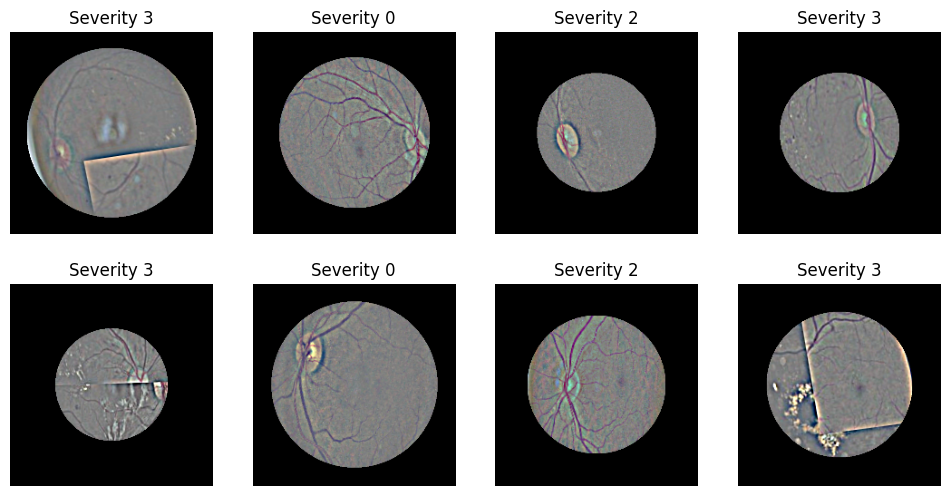

In [ ]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(2, 4, figsize = (12, 6))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x)
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

Ensembling

In [25]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [26]:
import os

checkpoint_dir = '/content/drive/MyDrive/final_ensemble_cut/'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [27]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.saving import register_keras_serializable

# Define Kappa Loss
@register_keras_serializable(package='Custom', name='kappa_loss')
def kappa_loss(y_true, y_pred):
    C = K.int_shape(y_pred)[-1]

    # Ensure y_true and y_pred are float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Compute weights based on class labels for the disagreement
    weights = tf.expand_dims(tf.range(C, dtype=tf.float32), 0)
    weights = K.square(weights - K.transpose(weights)) / (C - 1) ** 2

    # Observed disagreement (o)
    observed = tf.matmul(y_true, y_pred, transpose_a=True)
    observed = K.sum(weights * observed)

    # Expected disagreement (e)
    hist_true = K.sum(y_true, axis=0)
    hist_pred = K.sum(y_pred, axis=0)
    expected = tf.matmul(tf.expand_dims(hist_true, axis=1), tf.expand_dims(hist_pred, axis=0))
    expected = K.sum(weights * expected) / K.sum(hist_true)

    # Calculate Kappa loss
    kappa_loss = 1 - (observed / (expected + K.epsilon()))

    return kappa_loss


    # Define Combined Loss
@register_keras_serializable(package='Custom', name='combined_loss')
def combined_loss(kappa_weight=0.2):
    def loss(y_true, y_pred):
        # Calculate Categorical Cross-Entropy
        cross_entropy = tf.keras.losses.CategoricalCrossentropy()
        ce_loss = cross_entropy(y_true, y_pred)

        # Calculate Kappa Loss
        kappa = kappa_loss(y_true, y_pred)

        # Combine Losses
        return ce_loss + kappa_weight * kappa
    return loss


In [28]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras_tuner import HyperModel
from tensorflow.keras.models import load_model
import os

inceptionV3_model = load_model('/content/drive/MyDrive/ensemble_model_cut/inception_V3_c6.keras')
densenet169_model = load_model('/content/drive/MyDrive/dense_ensemb_cut/dense169_3.keras')
resnet_model = load_model('/content/drive/MyDrive/cut_ensemb-res/resnet152_5.keras',
                             custom_objects={'combined_loss': combined_loss})
efficientnet_model= load_model('/content/drive/MyDrive/effi_ensemb_cut/efficientnet_b7_best_model_5.keras')


# Load and rename the models
def rename_layers(model, prefix):
    config = model.get_config()
    for layer in config['layers']:
        layer['config']['name'] = f"{prefix}_{layer['config']['name']}"
    new_model = Model.from_config(config)
    for new_layer, layer in zip(new_model.layers, model.layers):
        try:
            new_layer.set_weights(layer.get_weights())
        except:
            pass
    return new_model

# Assume the models are loaded
inceptionV3_model = rename_layers(inceptionV3_model, 'inception')
densenet169_model = rename_layers(densenet169_model, 'densenet')
resnet_model = rename_layers(resnet_model, 'resnet')
efficientnet_model = rename_layers(efficientnet_model, 'efficientnet')


# Define the ensemble hypermodel with weighted averaging
class EnsembleHyperModel(HyperModel):
    def __init__(self, inceptionV3_model, densenet169_model, resnet_model, efficientnet_model):
        self.inceptionV3_model = inceptionV3_model
        self.densenet169_model = densenet169_model
        self.resnet_model = resnet_model
        self.efficientnet_model = efficientnet_model


    def build(self):
        for layer in self.resnet_model.layers:
            layer.trainable = False

        for layer in self.inceptionV3_model.layers:
            layer.trainable = False

        for layer in self.efficientnet_model.layers:
            layer.trainable = False

        for layer in self.densenet169_model.layers:
            layer.trainable = False

        # Get the output tensors from each model
        inceptionV3_output = self.inceptionV3_model.layers[-4].output
        densenet169_output = self.densenet169_model.layers[-4].output
        resnet_output = self.resnet_model.layers[-4].output
        efficientnet_output = self.efficientnet_model.layers[-4].output

        # Define weights for each model's output
        weights = [0.4, 0.3, 0.2, 0.1]  # InceptionV3 highest, DenseNet next, etc.

        # Compute weighted average of the model outputs
        weighted_output = Lambda(lambda outputs:
            weights[0] * outputs[0] +
            weights[1] * outputs[1] +
            weights[2] * outputs[2] +
            weights[3] * outputs[3]
        )([inceptionV3_output, densenet169_output, resnet_output, efficientnet_output])

        # Add new dense layers with L2 regularization and dropout
        x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05))(weighted_output)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)

        # Output layer
        NUM_CLASSES = 5
        final_output = Dense(NUM_CLASSES, activation='softmax')(x)

        # Create the new model
        ensemble_model = Model(inputs=[
            self.inceptionV3_model.input,
            self.densenet169_model.input,
            self.resnet_model.input,
            self.efficientnet_model.input
        ], outputs=final_output)

        # Compile the model
        learning_rate = 0.001
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        ensemble_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        return ensemble_model

# Initialize and build the hypermodel
hypermodel = EnsembleHyperModel(inceptionV3_model, densenet169_model, resnet_model, efficientnet_model)
ensemble_model = hypermodel.build()

# Custom generator function
def multi_input_generator(generator):
    while True:
        x, y = next(generator)
        yield (x, x, x, x), y

# Wrap the generators
train_multi_input_gen = multi_input_generator(train_generator)
val_multi_input_gen = multi_input_generator(val_generator)

# Define callbacks
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/final_ensemble_cut/ensemble_model1.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-8),
    checkpoint_callback
]

# Train the model
history = ensemble_model.fit(
    train_multi_input_gen,
    validation_data=val_multi_input_gen,
    epochs=150,
    steps_per_epoch=len(train_generator) // 16,
    validation_steps=len(val_generator) // 16,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 518s 67s/step - accuracy: 0.2305 - loss: 69.3701 - val_accuracy: 0.3125 - val_loss: 63.5208 - learning_rate: 0.0010
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 225s 45s/step - accuracy: 0.3943 - loss: 62.6472 - val_accuracy: 0.2500 - val_loss: 58.2255 - learning_rate: 0.0010
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 231s 46s/step - accuracy: 0.4685 - loss: 57.1316 - val_accuracy: 0.3750 - val_loss: 53.0602 - learning_rate: 0.0010
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 236s 47s/step - accuracy: 0.4275 - loss: 52.5498 - val_accuracy: 0.2188 - val_loss: 48.5511 - learning_rate: 0.0010
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 226s 45s/step - accuracy: 0.5029 - loss: 47.7657 - val_accuracy: 0.4688 - val_loss: 44.2240 - learning_rate: 0.0010
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 246s 49s/step - accuracy: 0.4264 - loss: 43.6062 - val_accuracy: 0.3438 - val_loss: 40.6618 - learning_rate: 0.0010
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 236s 47s/step - accuracy: 0.4502 - loss: 40.2

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras_tuner import HyperModel
from tensorflow.keras.models import load_model
import os

# Load the saved checkpoint model
ensemble_model = load_model('/content/drive/MyDrive/final_ensemble_cut/ensemble_model1.keras',custom_objects={'combined_loss': combined_loss}, safe_mode=False)

ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
# Custom generator function
def multi_input_generator(generator):
    while True:
        x, y = next(generator)
        yield (x, x, x, x), y

# Wrap the generators again
train_multi_input_gen = multi_input_generator(train_generator)
val_multi_input_gen = multi_input_generator(val_generator)

# Define callbacks again (ensure the checkpoint path is correct)
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/final_ensemble_cut/ensemble_model2.keras',),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-8),
    checkpoint_callback
]

# Continue training from epoch 82
history = ensemble_model.fit(
    train_multi_input_gen,
    validation_data=val_multi_input_gen,
    initial_epoch=81,  # Start from epoch 82
    epochs=150,  # Continue until epoch 150
    steps_per_epoch=len(train_generator) // 16,
    validation_steps=len(val_generator) // 16,
    batch_size=16,
    callbacks=callbacks
)

Epoch 82/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 417s 45s/step - accuracy: 0.5696 - loss: 2.3646 - val_accuracy: 0.4375 - val_loss: 2.3163 - learning_rate: 1.0000e-04
Epoch 83/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 181s 36s/step - accuracy: 0.6685 - loss: 2.0507 - val_accuracy: 0.6562 - val_loss: 2.0774 - learning_rate: 1.0000e-04
Epoch 84/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.6109 - loss: 2.1587 - val_accuracy: 0.3750 - val_loss: 2.3097 - learning_rate: 1.0000e-04
Epoch 85/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 67s 11s/step - accuracy: 0.5657 - loss: 2.1144 - val_accuracy: 0.5625 - val_loss: 2.1416 - learning_rate: 1.0000e-04
Epoch 86/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 218s 41s/step - accuracy: 0.6331 - loss: 2.2518 - val_accuracy: 0.5312 - val_loss: 2.0054 - learning_rate: 1.0000e-04
Epoch 87/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6159 - loss: 2.0619 - val_accuracy: 0.4688 - val_loss: 2.2366 - learning_rate: 1.0000e-04
Epoch 88/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 57s 9s/step - accuracy: 0.4656 

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras_tuner import HyperModel
from tensorflow.keras.models import load_model
import os

# Load the saved checkpoint model
ensemble_model = load_model('/content/drive/MyDrive/final_ensemble_cut/ensemble_model2.keras',custom_objects={'combined_loss': combined_loss}, safe_mode=False)

ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
# Custom generator function
def multi_input_generator(generator):
    while True:
        x, y = next(generator)
        yield (x, x, x, x), y

# Wrap the generators again
train_multi_input_gen = multi_input_generator(train_generator)
val_multi_input_gen = multi_input_generator(val_generator)

# Define callbacks again (ensure the checkpoint path is correct)
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/final_ensemble_cut/ensemble_model3.keras',),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-10),
    checkpoint_callback
]

# Continue training from epoch 82
history = ensemble_model.fit(
    train_multi_input_gen,
    validation_data=val_multi_input_gen,
    initial_epoch=91,  # Start from epoch 82
    epochs=150,  # Continue until epoch 150
    steps_per_epoch=len(train_generator) // 16,
    validation_steps=len(val_generator) // 16,
    batch_size=16,
    callbacks=callbacks
)

Epoch 92/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 399s 45s/step - accuracy: 0.5876 - loss: 2.0583 - val_accuracy: 0.5312 - val_loss: 2.0831 - learning_rate: 1.0000e-04
Epoch 93/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 180s 36s/step - accuracy: 0.6071 - loss: 2.1727 - val_accuracy: 0.5625 - val_loss: 1.9565 - learning_rate: 1.0000e-04
Epoch 94/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 170s 34s/step - accuracy: 0.5636 - loss: 2.1711 - val_accuracy: 0.5625 - val_loss: 1.9362 - learning_rate: 1.0000e-04
Epoch 95/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 75s 15s/step - accuracy: 0.6238 - loss: 1.8773 - val_accuracy: 0.5625 - val_loss: 2.1317 - learning_rate: 1.0000e-04
Epoch 96/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 206s 38s/step - accuracy: 0.5850 - loss: 1.9200 - val_accuracy: 0.5000 - val_loss: 1.9282 - learning_rate: 1.0000e-04
Epoch 97/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 68s 13s/step - accuracy: 0.6560 - loss: 1.8824 - val_accuracy: 0.5625 - val_loss: 1.9341 - learning_rate: 1.0000e-04
Epoch 98/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 233s 43s/step - accuracy: 0.

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras_tuner import HyperModel
from tensorflow.keras.models import load_model
import os

# Load the saved checkpoint model
ensemble_model = load_model('/content/drive/MyDrive/final_ensemble_cut/ensemble_model3.keras',custom_objects={'combined_loss': combined_loss}, safe_mode=False)

ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
# Custom generator function
def multi_input_generator(generator):
    while True:
        x, y = next(generator)
        yield (x, x, x, x), y

# Wrap the generators again
train_multi_input_gen = multi_input_generator(train_generator)
val_multi_input_gen = multi_input_generator(val_generator)

# Define callbacks again (ensure the checkpoint path is correct)
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/final_ensemble_cut/ensemble_model4.keras',),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-10),
    checkpoint_callback
]

# Continue training from epoch 82
history = ensemble_model.fit(
    train_multi_input_gen,
    validation_data=val_multi_input_gen,
    initial_epoch=125,  # Start from epoch 82
    epochs=150,  # Continue until epoch 150
    steps_per_epoch=len(train_generator) // 16,
    validation_steps=len(val_generator) // 16,
    batch_size=16,
    callbacks=callbacks
)

Epoch 126/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 388s 42s/step - accuracy: 0.5959 - loss: 1.7598 - val_accuracy: 0.5312 - val_loss: 1.9372 - learning_rate: 1.0000e-04
Epoch 127/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 137s 27s/step - accuracy: 0.5941 - loss: 1.7201 - val_accuracy: 0.7188 - val_loss: 1.5763 - learning_rate: 1.0000e-04
Epoch 128/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.5793 - loss: 1.7444 - val_accuracy: 0.6250 - val_loss: 1.6440 - learning_rate: 1.0000e-04
Epoch 129/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 51s 8s/step - accuracy: 0.5841 - loss: 1.7355 - val_accuracy: 0.6250 - val_loss: 1.9197 - learning_rate: 1.0000e-04
Epoch 130/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 49s 8s/step - accuracy: 0.6161 - loss: 1.6813 - val_accuracy: 0.5312 - val_loss: 1.8425 - learning_rate: 1.0000e-04
Epoch 131/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 158s 31s/step - accuracy: 0.5757 - loss: 1.9385 - val_accuracy: 0.6875 - val_loss: 1.5291 - learning_rate: 2.0000e-05
Epoch 132/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras_tuner import HyperModel
from tensorflow.keras.models import load_model
import os

# Load the saved checkpoint model
ensemble_model = load_model('/content/drive/MyDrive/final_ensemble_cut/ensemble_model4.keras',custom_objects={'combined_loss': combined_loss}, safe_mode=False)

ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2.0000e-05),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
# Custom generator function
def multi_input_generator(generator):
    while True:
        x, y = next(generator)
        yield (x, x, x, x), y

# Wrap the generators again
train_multi_input_gen = multi_input_generator(train_generator)
val_multi_input_gen = multi_input_generator(val_generator)

# Define callbacks again (ensure the checkpoint path is correct)
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('/content/drive/MyDrive/final_ensemble_cut/ensemble_model5.keras',),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-10),
    checkpoint_callback
]

# Continue training from epoch 82
history = ensemble_model.fit(
    train_multi_input_gen,
    validation_data=val_multi_input_gen,
    initial_epoch=150,  # Start from epoch 82
    epochs=200,  # Continue until epoch 150
    steps_per_epoch=len(train_generator) // 16,
    validation_steps=len(val_generator) // 16,
    batch_size=16,
    callbacks=callbacks
)

Epoch 151/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 364s 36s/step - accuracy: 0.6423 - loss: 1.7213 - val_accuracy: 0.5625 - val_loss: 1.7230 - learning_rate: 2.0000e-05
Epoch 152/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 136s 27s/step - accuracy: 0.6222 - loss: 1.7476 - val_accuracy: 0.5938 - val_loss: 1.5830 - learning_rate: 2.0000e-05
Epoch 153/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 121s 24s/step - accuracy: 0.6226 - loss: 1.6236 - val_accuracy: 0.7188 - val_loss: 1.4948 - learning_rate: 2.0000e-05
Epoch 154/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 842ms/step - accuracy: 0.6126 - loss: 1.7344 - val_accuracy: 0.5625 - val_loss: 1.7713 - learning_rate: 2.0000e-05
Epoch 155/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - accuracy: 0.7032 - loss: 1.4896 - val_accuracy: 0.4688 - val_loss: 1.6282 - learning_rate: 2.0000e-05
Epoch 156/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.5506 - loss: 1.8184 - val_accuracy: 0.5625 - val_loss: 1.7555 - learning_rate: 2.0000e-05
Epoch 157/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy:

In [33]:
val_loss, val_accuracy =  ensemble_model.evaluate(val_multi_input_gen, steps=len(val_generator))

print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.6157 - loss: 1.6437
Validation Accuracy: 0.6225000023841858
Validation Loss: 1.6401379108428955


In [36]:
val_loss, val_accuracy =  ensemble_model.evaluate(val_multi_input_gen, steps=len(val_generator))

print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.6485 - loss: 1.6355
Validation Accuracy: 0.6312500238418579
Validation Loss: 1.6684247255325317


Evaluation

In [39]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# # Load the saved model
# model_save_path = '/content/drive/MyDrive/ensemble_model_cut/inception_V3_c3.keras'
# inception_model = load_model(model_save_path)

batch_size = 16
all_predictions = []

true_Y_labels = []

for i in range(len(val_generator)):
    x_batch, y_batch = next(val_multi_input_gen)
    batch_predictions = ensemble_model.predict(x_batch)
    all_predictions.append(batch_predictions)
    true_Y_labels.append(y_batch)
pred_Y = np.concatenate(all_predictions)
true_Y = np.concatenate(true_Y_labels)

pred_Y_labels = np.argmax(pred_Y, axis=1)
true_Y_labels = np.argmax(true_Y, axis=1)

report = classification_report(true_Y_labels, pred_Y_labels, target_names=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])

print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
              precision  

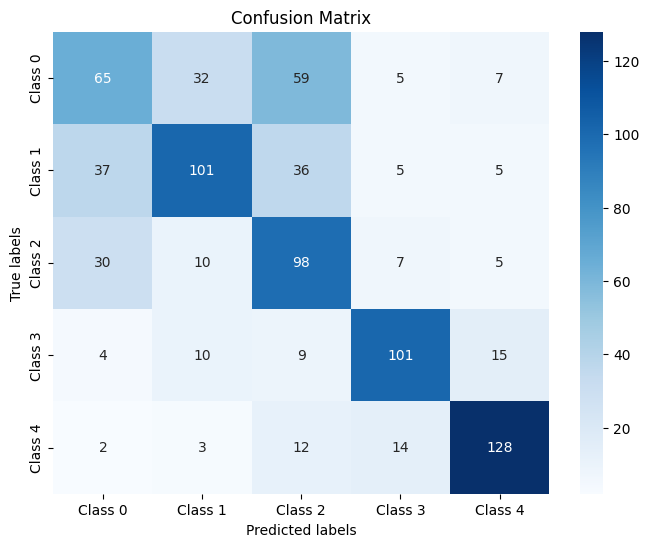

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_Y_labels, pred_Y_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
